In [167]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import math
import statistics as st
import seaborn as sns
import warnings as wg
wg.filterwarnings('ignore')
from datetime import datetime as dt
import humanize as hz

In [168]:
df = pd.read_csv("Desktop/Learning Folder/python/DATASET/Predictive_Maintenance_Dataset.csv")
df.shape

(5000, 18)

In [169]:
df.head()

,Record_ID,Timestamp,Equipment_Type,Equipment_ID,Location,Temperature_C,Vibration_mm_s,Pressure_PSI,RPM,Power_Consumption_kW,Operating_Hours,Days_Since_Last_Maintenance,Failure_Risk_Score,Maintenance_Required,Failure_Type,Estimated_Days_To_Failure,Downtime_Hours,Maintenance_Cost_USD
0,REC00001,2023-01-01 00:00:00,Wind Turbine,EQ0172,Plant B - Ohio,70.3,3.0,101.4,1931,103.6,526,21,0.03,No,NaN,92,0,0.00
1,REC00002,2023-01-01 02:00:00,Jet Engine,EQ0171,Plant E - Pennsylvania,67.9,3.5,94.8,3193,53.0,521,21,0.26,No,NaN,102,0,0.00
2,REC00003,2023-01-01 04:00:00,CNC Machine,EQ0124,Plant A - Texas,74.3,3.4,102.3,1602,190.3,688,28,0.12,No,NaN,117,0,0.00
3,REC00004,2023-01-01 06:00:00,Jet Engine,EQ0360,Plant A - Texas,77.6,4.2,91.8,2888,138.0,395,16,0.27,No,NaN,85,9,33714.35
4,REC00005,2023-01-01 08:00:00,Manufacturing Robot,EQ0372,Plant C - California,68.4,4.3,89.0,2821,123.2,559,23,0.23,No,NaN,52,0,0.00


In [170]:
# basic data exploration:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Record_ID                    5000 non-null   object 
 1   Timestamp                    5000 non-null   object 
 2   Equipment_Type               5000 non-null   object 
 3   Equipment_ID                 5000 non-null   object 
 4   Location                     5000 non-null   object 
 5   Temperature_C                5000 non-null   float64
 6   Vibration_mm_s               5000 non-null   float64
 7   Pressure_PSI                 5000 non-null   float64
 8   RPM                          5000 non-null   int64  
 9   Power_Consumption_kW         5000 non-null   float64
 10  Operating_Hours              5000 non-null   int64  
 11  Days_Since_Last_Maintenance  5000 non-null   int64  
 12  Failure_Risk_Score           5000 non-null   float64
 13  Maintenance_Requir

Record_ID                         0
Timestamp                         0
Equipment_Type                    0
Equipment_ID                      0
Location                          0
Temperature_C                     0
Vibration_mm_s                    0
Pressure_PSI                      0
RPM                               0
Power_Consumption_kW              0
Operating_Hours                   0
Days_Since_Last_Maintenance       0
Failure_Risk_Score                0
Maintenance_Required              0
Failure_Type                   4557
Estimated_Days_To_Failure         0
Downtime_Hours                    0
Maintenance_Cost_USD              0
dtype: int64

In [171]:
# Unique values of each categorical columns:
print('Unique values in each column')
for cols in df[['Equipment_Type','Location','Failure_Type','Maintenance_Required']]:
    print(cols, ":", df[cols].unique())

Unique values in each column
Equipment_Type : ['Wind Turbine' 'Jet Engine' 'CNC Machine' 'Manufacturing Robot'
 'Gas Turbine']
Location : ['Plant B - Ohio' 'Plant E - Pennsylvania' 'Plant A - Texas'
 'Plant C - California' 'Plant D - Michigan']
Failure_Type : [nan 'Mechanical Wear' 'Power Fluctuation' 'Bearing Failure' 'Overheating'
 'Pressure Issue']
Maintenance_Required : ['No' 'Yes']


In [172]:
# converting to datetime datatype:
df['Timestamp']= pd.to_datetime(df['Timestamp'])
df['Timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: Timestamp
Non-Null Count  Dtype         
--------------  -----         
5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 39.2 KB


# Key Performance Indicators (KPI):

In [173]:
# ===============================================================
# Total number of failures:
total_record= len(df)
failures_count= df['Failure_Type'].count()
failure_rate= (failures_count/total_record)*100
print(f'Total number of failures: {failures_count}')
print(f'failure Rate: ({failure_rate}%)')
# ===============================================================

# ===============================================================
# Total maintanance cost:
total_cost= df['Maintenance_Cost_USD'].sum()
print(f'Total maintaince cost ${hz.intword(total_cost)}')
# ===============================================================

# ===============================================================
# Total downtime hours:
total_hours= df['Downtime_Hours'].sum()
print(f"Total downtime Hours: {total_hours} hours")
# ===============================================================

# ===============================================================
# Avg cost per failure:
avg_cost= (total_cost/failures_count)*100
print(f'Avg cost per failure: ${hz.intword(avg_cost)}')
# ===============================================================

# ===============================================================
# Avg Failure Risk score:
avg_risk_score= df['Failure_Risk_Score'].mean()
print(f'Avg Failure Risk Score: {round(avg_risk_score,2)} out of 1')
# ===============================================================

# =============================================================== 
# Total flytime hours:
flytime_hours= df['Operating_Hours'].sum()
print(f'Total flytime: {hz.intword(flytime_hours)} hours')
# ===============================================================

Total number of failures: 443
failure Rate: (8.86%)
Total maintaince cost $6.4 million
Total downtime Hours: 5527 hours
Avg cost per failure: $1.4 million
Avg Failure Risk Score: 0.36 out of 1
Total flytime: 27.5 million hours


# COST ANALYSIS:

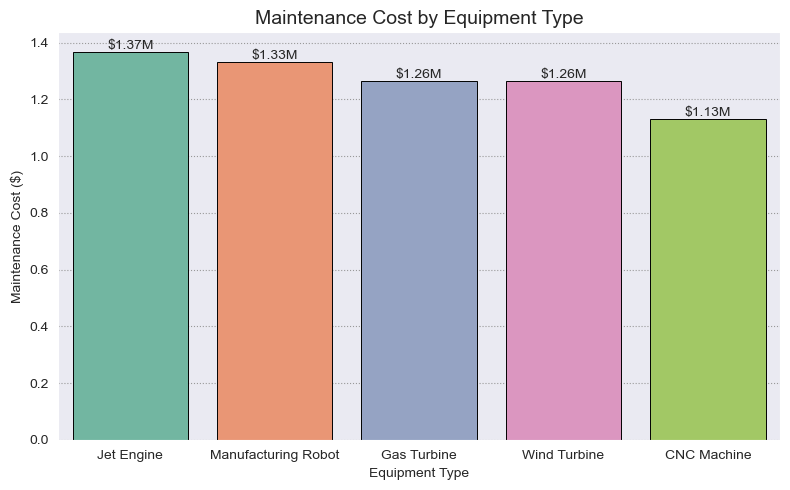

In [174]:
# Maintainance cost by equipment type:
equipment_costs = (
    df.groupby('Equipment_Type')['Maintenance_Cost_USD']
      .sum()
      .sort_values(ascending=False)
      .reset_index())
equipment_costs['Cost_Millions'] = equipment_costs['Maintenance_Cost_USD'] / 1_000_000

# BarPlot
plt.figure(figsize=(8,5))
ax = sns.barplot(
    x='Equipment_Type',
    y='Cost_Millions',
    data=equipment_costs,
    palette='Set2',
    edgecolor='black',
    linewidth=0.7)

# Add value labels
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height,
        f'${height:.2f}M',
        ha='center',
        va='bottom',
        fontsize=10)

plt.xlabel('Equipment Type')
plt.ylabel('Maintenance Cost ($)')
plt.title('Maintenance Cost by Equipment Type', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Insight:
The analysis indicates that Jet Engine equipment accounts for the highest maintenance expenditure compared to other equipment types.

Business Implication:
Given its significant cost impact, it would be prudent to allocate a proportionally higher maintenance budget toward Jet Engine equipment to ensure operational reliability and minimize potential downtime risks.

Total failure count: Failure_Type
Bearing Failure      104
Power Fluctuation     95
Overheating           86
Mechanical Wear       84
Pressure Issue        74
Name: count, dtype: int64


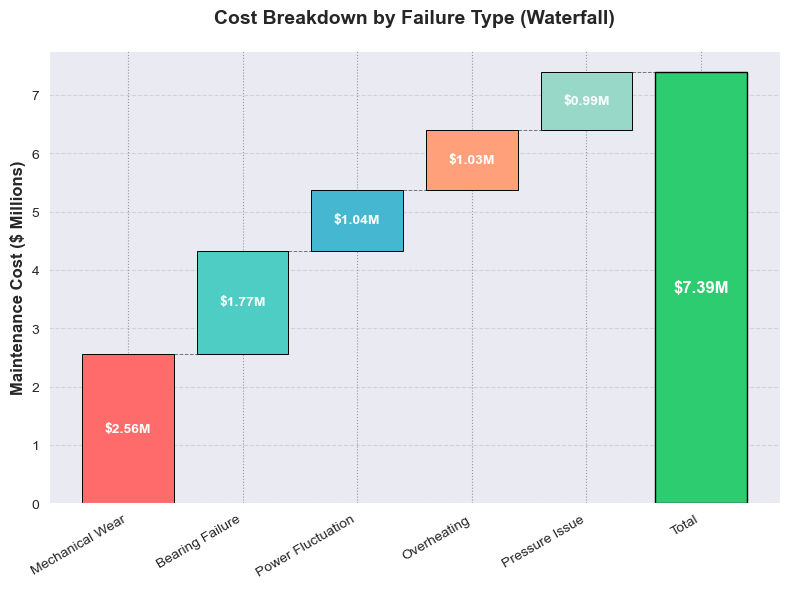

In [175]:
# failure type count:
failure_count= df['Failure_Type'].value_counts()
print(f"Total failure count: {failure_count}")

# Maintainance cost by Failure types:
failure_costs = df[df['Failure_Type'] != 'None'].groupby('Failure_Type')['Maintenance_Cost_USD'].sum().sort_values(ascending=False)
failure_costs= failure_costs/100000

# Waterfall chart
fig, ax = plt.subplots(figsize=(8,6))

# Cumulative values
categories = list(failure_costs.index) + ['Total']
values = list(failure_costs.values) + [failure_costs.sum()]
cumulative = [0]
for i, val in enumerate(values[:-1]):
    cumulative.append(cumulative[-1] + val)

# bars and labellings
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#2ECC71']

for i, (cat, val) in enumerate(zip(categories, values)):
    if i < len(categories) - 1:
        ax.bar(i, val, bottom=cumulative[i], color=colors[i], edgecolor='black', linewidth=0.7)
        # Add value labels
        ax.text(i, cumulative[i] + val/2, f'${val:.2f}M', 
                ha='center', va='center', fontsize=10, fontweight='bold', color='white')
    else:
        # Total bar
        ax.bar(i, val, color='#2ECC71', edgecolor='black', linewidth=1)
        ax.text(i, val/2, f'${val:.2f}M', 
                ha='center', va='center', fontsize=12, fontweight='bold', color='white')

# Connecting lines
for i in range(len(categories) - 1):
    ax.plot([i + 0.4, i + 1 - 0.4], 
            [cumulative[i+1], cumulative[i+1]], 
            'k--', linewidth=0.7, alpha=0.5)

# Chart formatting
ax.set_xticks(range(len(categories)))
ax.set_xticklabels(categories, rotation=30, ha='right')
ax.set_ylabel('Maintenance Cost ($ Millions)', fontsize=12, fontweight='bold')
ax.set_title('Cost Breakdown by Failure Type (Waterfall)', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Insight:
Mechanical wear is the most cost-intensive failure category, contributing the highest share of total maintenance expenditure. In addition, bearing failures represent the second-highest maintenance cost and appear to occur unexpectedly, increasing operational risk.

Business Implication:
To mitigate financial impact and reduce unplanned downtime, it is recommended to:

1. Prioritize preventive maintenance programs targeting bearing components.
2. Allocate a higher portion of the maintenance budget toward managing mechanical wear.
3. Implement condition monitoring strategies to proactively detect early signs of wear and bearing degradation.

This approach can help lower failure frequency, stabilize maintenance costs, and improve overall equipment reliability.

In [176]:
# month and year extracted from timestamp column:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Month_Name'] = df['Timestamp'].dt.strftime('%b') 

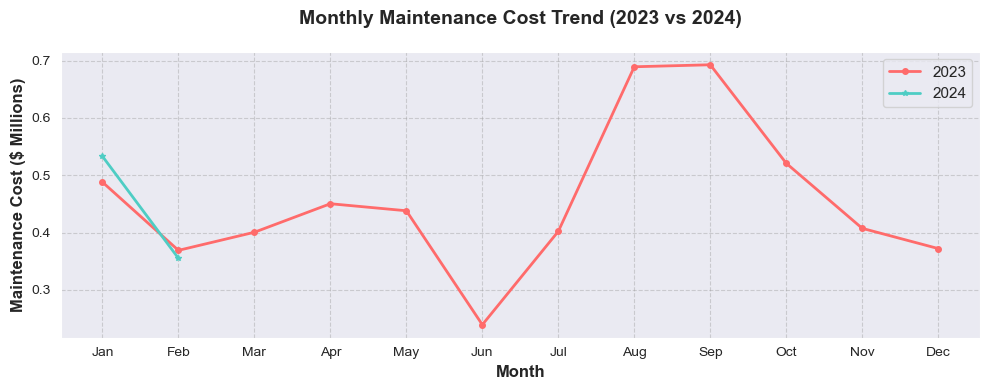

MONTHLY COST SUMMARY (in Millions)

2023 Total: $5.47M
2024 Total: $0.89M, because we have only 2 months data


In [177]:
# Monthly costs by year and month:
monthly_cost = df.groupby(['Year', 'Month', 'Month_Name'])['Maintenance_Cost_USD'].sum().reset_index()
monthly_cost['Cost_Millions'] = monthly_cost['Maintenance_Cost_USD'] / 1000000

# Create plot
plt.figure(figsize=(10,4))

# Plot 2023
data_2023 = monthly_cost[monthly_cost['Year'] == 2023]
plt.plot(data_2023['Month'], data_2023['Cost_Millions'], 
         marker='o', linewidth=2, markersize=4, 
         color='#FF6B6B', label='2023', linestyle='-')

# Plot 2024
data_2024 = monthly_cost[monthly_cost['Year'] == 2024]
plt.plot(data_2024['Month'], data_2024['Cost_Millions'], 
         marker='*', linewidth=2, markersize=4, 
         color='#4ECDC4', label='2024', linestyle='-')

# Styling
plt.xlabel('Month', fontsize=12, fontweight='bold')
plt.ylabel('Maintenance Cost ($ Millions)', fontsize=12, fontweight='bold')
plt.title('Monthly Maintenance Cost Trend (2023 vs 2024)', fontsize=14, fontweight='bold', pad=20)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(fontsize=11, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('monthly_cost_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print summary
print("=" * 70)
print("MONTHLY COST SUMMARY (in Millions)")
print(f"\n2023 Total: ${data_2023['Cost_Millions'].sum():.2f}M")
print(f"2024 Total: ${data_2024['Cost_Millions'].sum():.2f}M, because we have only 2 months data")
print("=" * 70)

Insight (2023):
Maintenance expenditure peaks in August and September, making them the highest-cost months of the year. In contrast, June reflects the lowest maintenance spending. Notably, there is a sharp cost escalation immediately after June, indicating the possible influence of external or seasonal factors affecting equipment performance and sensor reliability.

Business Implication:
1. Conduct a root cause assessment to identify environmental, operational, or seasonal drivers behind the post-June cost surge.
2. Increase preventive maintenance readiness ahead of the August–September period to reduce unexpected breakdowns.
3. Allocate additional maintenance budget for Q3 to proactively manage anticipated cost spikes.

Taking a preventive and seasonal planning approach will help stabilize expenses and reduce operational disruptions during peak-risk months.

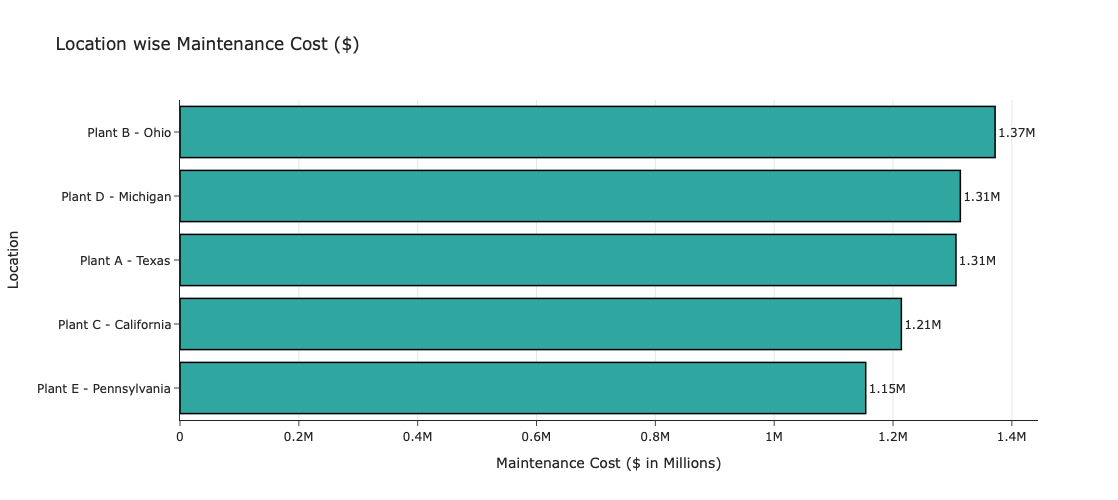

In [187]:
# Locaton wise maintainence cost:
location_cost = (
    df.groupby('Location')['Maintenance_Cost_USD']
    .sum()
    .sort_values()
    .reset_index()
)

# bar chart:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=location_cost['Maintenance_Cost_USD'],
    y=location_cost['Location'],
    orientation='h',
    marker=dict(
        color='#2FA7A0',     
        line=dict(
            color='black',   
            width=1.5       
        )
    ),
    text=[f"{val/1_000_000:.2f}M" for val in location_cost['Maintenance_Cost_USD']],
    textposition='outside'
))

fig.update_layout(
    title='Location wise Maintenance Cost ($)',
    xaxis_title='Maintenance Cost ($ in Millions)',
    yaxis_title='Location',
    template='simple_white',
    height=500,
    width=900)

fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=False)

fig.show()

**Insight:**
Plant E (Pennsylvania) consistently demonstrates the lowest maintenance cost among all plant locations, indicating strong cost efficiency. This performance may be driven by internal advantages such as operational efficiency and optimized engineering processes, as well as external factors including favorable raw material costs and strategic location benefits.

**Business Implication:**

* Consider benchmarking Plant E’s operational practices and replicating them across other facilities.
* Leverage Plant E as a primary hub for maintenance-intensive activities where feasible.
* Deploy high-performing and process-oriented teams to further enhance efficiency and drive additional cost reductions.

This approach supports cost optimization while maintaining operational reliability across the network.


In [59]:
# extracting hours for detailed time series analysis:
df['Hour']= df['Timestamp'].dt.hour
df.head(5)

,Record_ID,Timestamp,Equipment_Type,Equipment_ID,Location,Temperature_C,Vibration_mm_s,Pressure_PSI,RPM,Power_Consumption_kW,...,Maintenance_Cost_USD,Temp_Status,Vibration_Status,Pressure_Status,Maintenance_Status,Risk_Category,Year,Month,Month_Name,Hour
0,REC00001,2023-01-01 00:00:00,Wind Turbine,EQ0172,Plant B - Ohio,70.3,3.0,101.4,1931,103.6,...,0.00,Optimal,Optimal,Optimal,Recent,Low,2023,1,Jan,0
1,REC00002,2023-01-01 02:00:00,Jet Engine,EQ0171,Plant E - Pennsylvania,67.9,3.5,94.8,3193,53.0,...,0.00,Optimal,Optimal,Low,Recent,Low,2023,1,Jan,2
2,REC00003,2023-01-01 04:00:00,CNC Machine,EQ0124,Plant A - Texas,74.3,3.4,102.3,1602,190.3,...,0.00,Optimal,Optimal,Optimal,Recent,Low,2023,1,Jan,4
3,REC00004,2023-01-01 06:00:00,Jet Engine,EQ0360,Plant A - Texas,77.6,4.2,91.8,2888,138.0,...,33714.35,Normal,Optimal,Low,Recent,Low,2023,1,Jan,6
4,REC00005,2023-01-01 08:00:00,Manufacturing Robot,EQ0372,Plant C - California,68.4,4.3,89.0,2821,123.2,...,0.00,Optimal,Optimal,Low,Recent,Low,2023,1,Jan,8


    Hour  Maintenance_Cost_USD
0      0               1770.87
1      2               1313.74
2      4                955.75
3      6                986.54
4      8               1299.91
5     10               1242.21
6     12               1285.00
7     14                780.60
8     16               1440.92
9     18               1291.59
10    20                812.87
11    22               2083.27


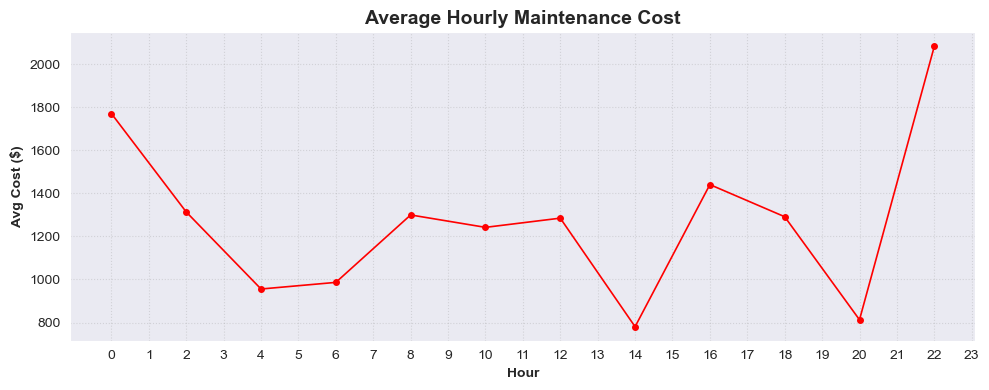

In [60]:
# Average Hourly maintainance cost:
avg_hourly_cost = (df.groupby('Hour')['Maintenance_Cost_USD'].mean().reset_index().sort_values('Hour').round(2))
print(avg_hourly_cost)

# Line Plot
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.figure(figsize=(10,4))

plt.plot(avg_hourly_cost['Hour'],avg_hourly_cost['Maintenance_Cost_USD'],
    color='red',marker='o',markersize=4,linewidth=1.2
)

plt.title("Average Hourly Maintenance Cost", fontweight='bold', fontsize=14)
plt.xlabel('Hour', fontweight='bold')
plt.ylabel('Avg Cost ($)', fontweight='bold')
plt.xticks(range(0,24))
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

*Insight*
1. Peak maintenance cost occurs between 22:00–24:00 hours.
2. The higher average cost during this period is primarily driven by internal factors, such as increased night service charges and operational overhead.
3. This time window represents a cost-intensive operational period rather than necessarily a higher failure frequency.

# EQUIPMENT PERFORMANCE ANALYSIS:

Equipment wise failure rate: Equipment_Type
Gas Turbine            9.7
CNC Machine            9.5
Wind Turbine           9.4
Manufacturing Robot    7.8
Jet Engine             7.8
dtype: float64


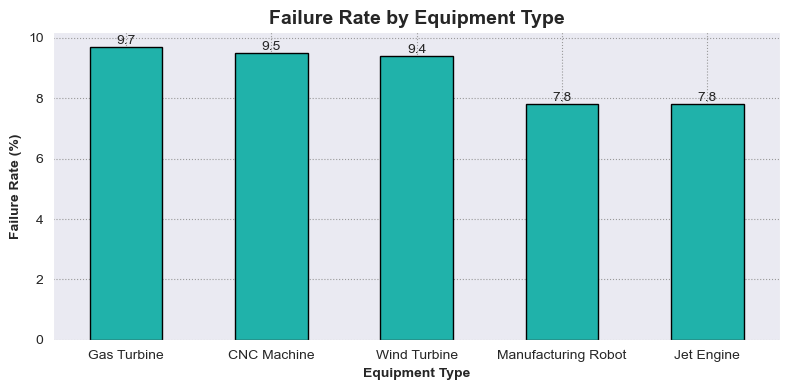

In [109]:
# failure rate by equipment type:
equipment_failure_rate = (df.groupby('Equipment_Type').apply(lambda x: x['Failure_Type'].notna().sum() / len(x) * 100)
                          .sort_values(ascending=False).round(1))
print(f"Equipment wise failure rate: {equipment_failure_rate}")

# bar chart:
plt.figure(figsize=(8,4))
ax= equipment_failure_rate.plot(kind='bar', color= 'lightseagreen', edgecolor='black', linewidth=1)
ax.bar_label(ax.containers[0])

plt.ylabel('Failure Rate (%)', fontweight='bold')
plt.xlabel('Equipment Type', fontweight='bold')
plt.title('Failure Rate by Equipment Type', fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Key Finding

Gas Turbine equipment has the highest failure rate.
This makes it our highest-risk equipment.
Jet Engine has the lowest failure rate, at 7.8 failures per 100 units.
This makes it comparatively more reliable.

Average Downtime Hours by Failure Type:

Failure_Type
Mechanical Wear      19.14
Overheating          21.50
Bearing Failure      24.29
Power Fluctuation    27.00
Pressure Issue       39.00
Name: Downtime_Hours, dtype: float64


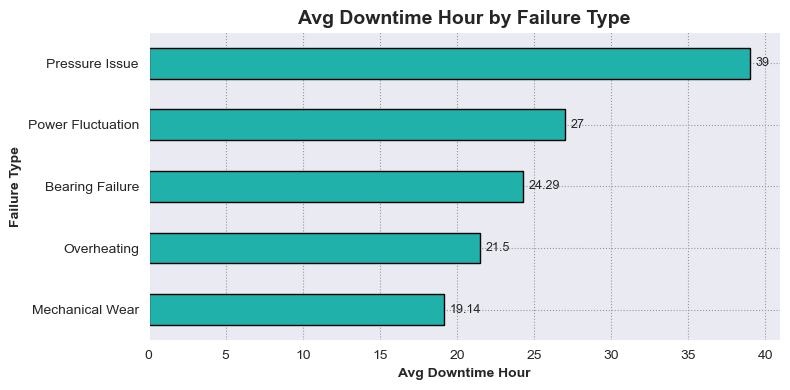

In [62]:
# Avg downtime hours by failure type:
avg_failure_downtime = (df[(df['Downtime_Hours'] > 0) & (df['Failure_Type'] != 'None')]
                        .groupby('Failure_Type')['Downtime_Hours']
                        .mean()
                        .sort_values(ascending=True).round(2))

print("Average Downtime Hours by Failure Type:")
print(f'\n{avg_failure_downtime}')

# horizontal bar chart:
plt.figure(figsize=(8,4))
dt_ax= avg_failure_downtime.plot(kind='barh', color= 'lightseagreen', edgecolor= 'black', linewidth=1)
dt_ax.bar_label(dt_ax.containers[0], padding=4, fontsize=9)

plt.ylabel('Failure Type', fontweight='bold')
plt.xlabel('Avg Downtime Hour', fontweight='bold')
plt.title('Avg Downtime Hour by Failure Type', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

### Key Finding

* **Pressure-related failures cause the highest downtime hours.**
* This means when a pressure issue happens, it keeps the equipment stopped for a longer time compared to other failures.

In [77]:
# Avg failure risk score per equipment type:
equipment_risk = df.pivot_table(
    values='Failure_Risk_Score',
    index='Equipment_Type',
    aggfunc='mean'
).sort_values('Failure_Risk_Score', ascending=False).round(2)

print("Average Failure Risk Score by Equipment Type:")
print(f'\n{equipment_risk}')

Average Failure Risk Score by Equipment Type:

                     Failure_Risk_Score
Equipment_Type                         
Gas Turbine                        0.37
Wind Turbine                       0.37
CNC Machine                        0.36
Manufacturing Robot                0.36
Jet Engine                         0.36


Insight= we can observe that there is a pattern which clearly shows that most of the issues are arising due to gas turbines equipment, company have to allocate more resources on gas turbine equipment to reduce failure risk score and reduce maintenance cost as well.

# Sensor Analysis and Distribution:

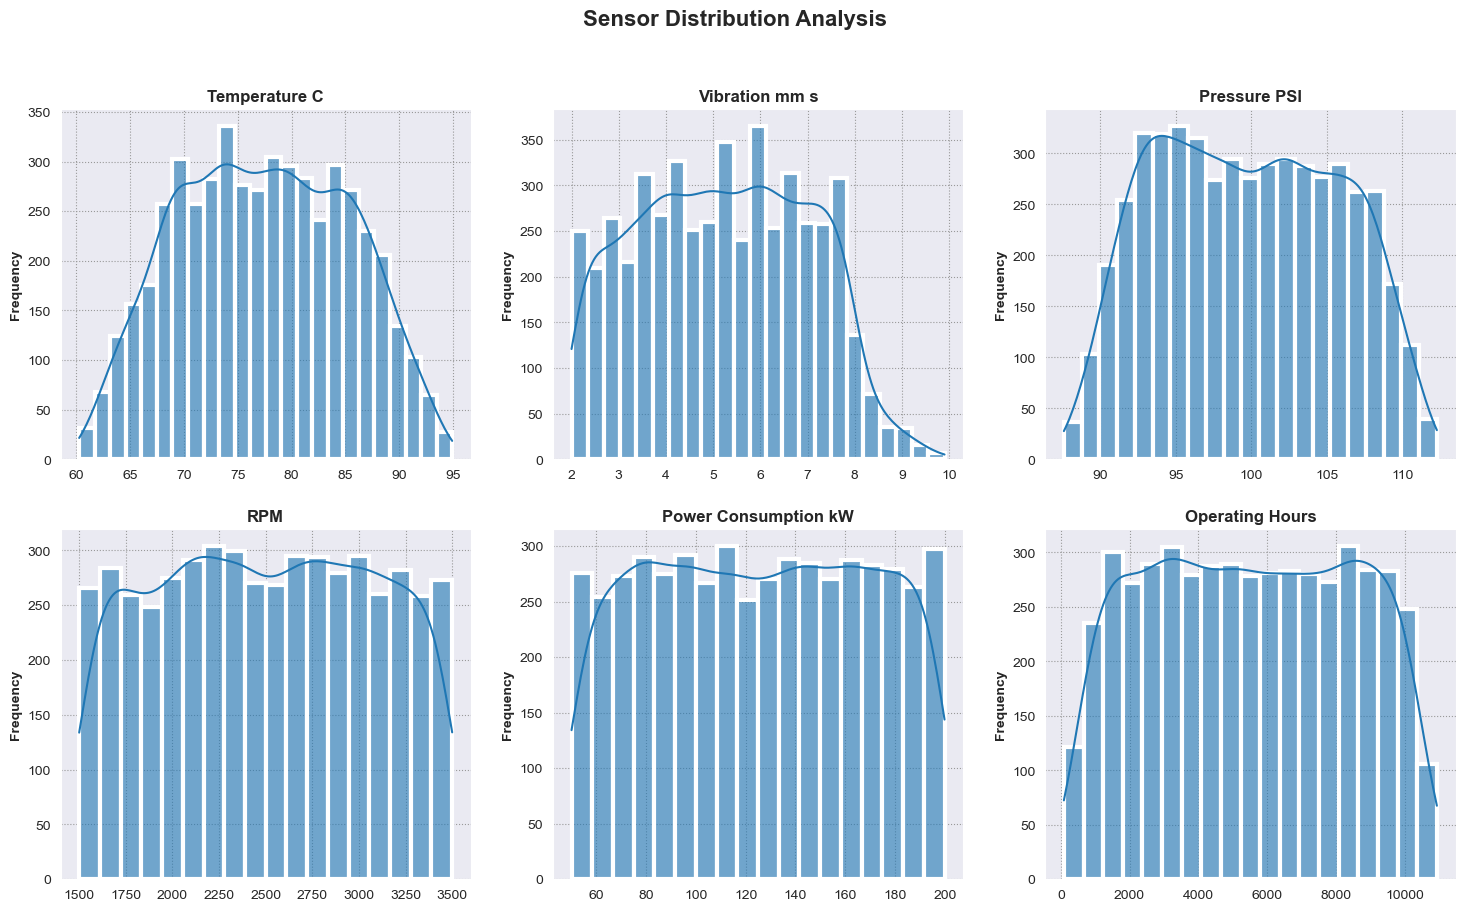

In [184]:
# Distribution of sensor data:
sensors = ['Temperature_C', 'Vibration_mm_s', 'Pressure_PSI', 
           'RPM', 'Power_Consumption_kW', 'Operating_Hours']

# Creating subplots:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# Plot distribution:
for i, sensor in enumerate(sensors):
    sns.histplot(df[sensor], kde=True, ax=axes[i], 
                alpha=0.6,linewidth=3)
    
    axes[i].set_title(sensor.replace('_', ' '), fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency', fontsize=10, fontweight='bold')
    axes[i].grid(axis='y', alpha=1)

fig.suptitle('Sensor Distribution Analysis', fontsize=16, fontweight='bold')
plt.tight_layout
plt.savefig('distribution.png')
plt.show()

In [181]:
# categorizing:
def categorize_sensors(df):  
    # Temperature categories
    df['Temp_Status'] = pd.cut(df['Temperature_C'], 
                                bins=[0, 75, 82, 85, 90, 100],
                                labels=['Optimal', 'Normal', 'Elevated', 'Critical', 'Emergency']) 
    # Vibration categories
    df['Vibration_Status'] = pd.cut(df['Vibration_mm_s'], 
                                     bins=[0, 4.5, 6.0, 7.0, 8.5, 15],
                                     labels=['Optimal', 'Acceptable', 'Warning', 'Critical', 'Severe'])   
    # Pressure categories
    df['Pressure_Status'] = pd.cut(df['Pressure_PSI'], 
                                    bins=[0, 95, 105, 110, 150],
                                    labels=['Low', 'Optimal', 'Acceptable', 'High'])  
    # Maintenance overdue
    df['Maintenance_Status'] = pd.cut(df['Days_Since_Last_Maintenance'], 
                                       bins=[0, 30, 45, 60, 75, 1000],
                                       labels=['Recent', 'Normal', 'Due Soon', 'Overdue', 'Critical']) 
    # Risk categories
    df['Risk_Category'] = pd.cut(df['Failure_Risk_Score'], 
                                  bins=[0, 0.3, 0.5, 0.7, 0.85, 1.0],
                                  labels=['Low', 'Moderate', 'Elevated', 'High', 'Imminent'])  
    return df
df = categorize_sensors(df)
df.head(2)

,Record_ID,Timestamp,Equipment_Type,Equipment_ID,Location,Temperature_C,Vibration_mm_s,Pressure_PSI,RPM,Power_Consumption_kW,...,Downtime_Hours,Maintenance_Cost_USD,Year,Month,Month_Name,Temp_Status,Vibration_Status,Pressure_Status,Maintenance_Status,Risk_Category
0,REC00001,2023-01-01 00:00:00,Wind Turbine,EQ0172,Plant B - Ohio,70.3,3.0,101.4,1931,103.6,...,0,0.0,2023,1,Jan,Optimal,Optimal,Optimal,Recent,Low
1,REC00002,2023-01-01 02:00:00,Jet Engine,EQ0171,Plant E - Pennsylvania,67.9,3.5,94.8,3193,53.0,...,0,0.0,2023,1,Jan,Optimal,Optimal,Low,Recent,Low


In [182]:
# check for unique values in each categorical column:
for cols in df.select_dtypes(include=['category']):
    print(cols, ':', df[cols].unique())

Temp_Status : ['Optimal', 'Normal', 'Elevated', 'Critical', 'Emergency']
Categories (5, object): ['Optimal' < 'Normal' < 'Elevated' < 'Critical' < 'Emergency']
Vibration_Status : ['Optimal', 'Warning', 'Acceptable', 'Critical', 'Severe']
Categories (5, object): ['Optimal' < 'Acceptable' < 'Warning' < 'Critical' < 'Severe']
Pressure_Status : ['Optimal', 'Low', 'High', 'Acceptable']
Categories (4, object): ['Low' < 'Optimal' < 'Acceptable' < 'High']
Maintenance_Status : ['Recent', 'Normal', 'Due Soon', 'Overdue', 'Critical']
Categories (5, object): ['Recent' < 'Normal' < 'Due Soon' < 'Overdue' < 'Critical']
Risk_Category : ['Low', 'Moderate', 'Elevated', NaN, 'Imminent', 'High']
Categories (5, object): ['Low' < 'Moderate' < 'Elevated' < 'High' < 'Imminent']


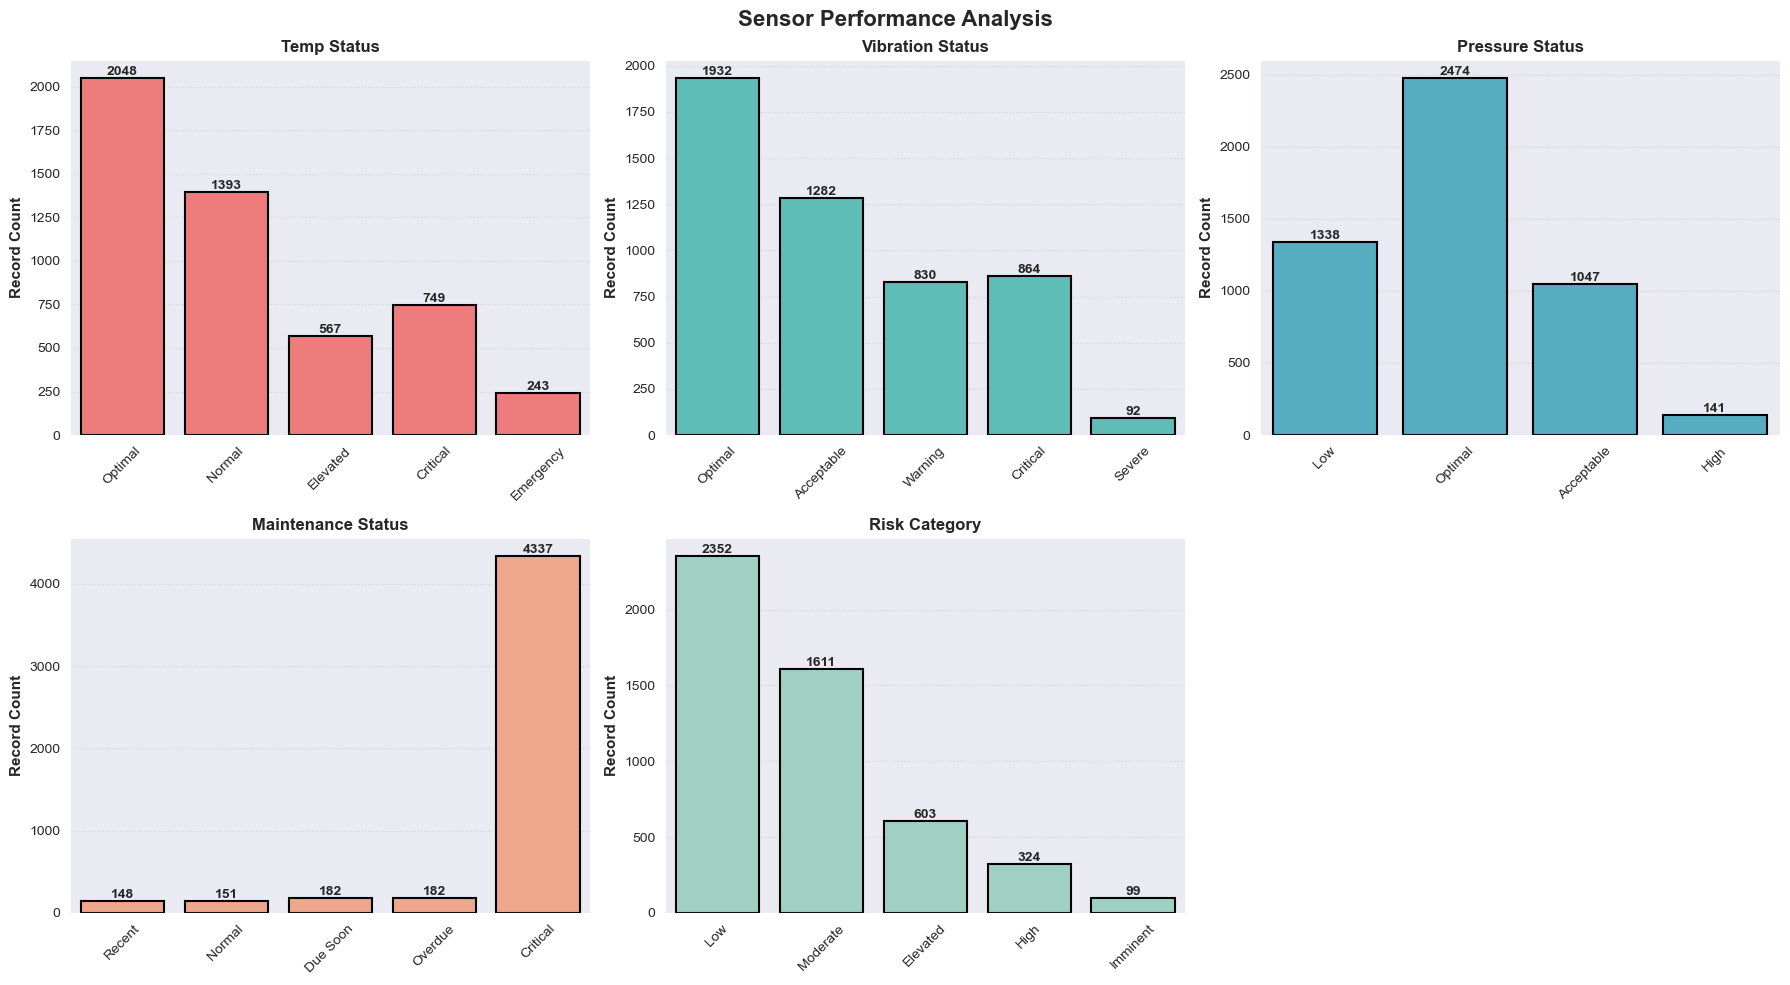

In [183]:
# Sensor performance analysis:
categories = ['Temp_Status', 'Vibration_Status', 'Pressure_Status', 
              'Maintenance_Status', 'Risk_Category']

# Creating subplots:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# colors
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

# Plot each category:
for idx, category in enumerate(categories):
    # countplot
    sns.countplot(data=df, x=category, ax=axes[idx], 
                 color=colors[idx], edgecolor='black', linewidth=1.5)
    
    # value labels
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%d', fontsize=10, fontweight='bold')
    
    # styling
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Record Count', fontsize=11, fontweight='bold')
    axes[idx].set_title(category.replace('_', ' '), fontsize=12, fontweight='bold')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

# Removed extra subplot
fig.delaxes(axes[5])

# Title
fig.suptitle('Sensor Performance Analysis', 
             fontsize=16, fontweight='bold', y=0.98)

plt.tight_layout()
plt.savefig('sensor.png')
plt.show()

Total machines: 5000
Machines needing maintenance: 443 (8.86%)
Machines NOT needing maintenance: 4557 (91.14%)


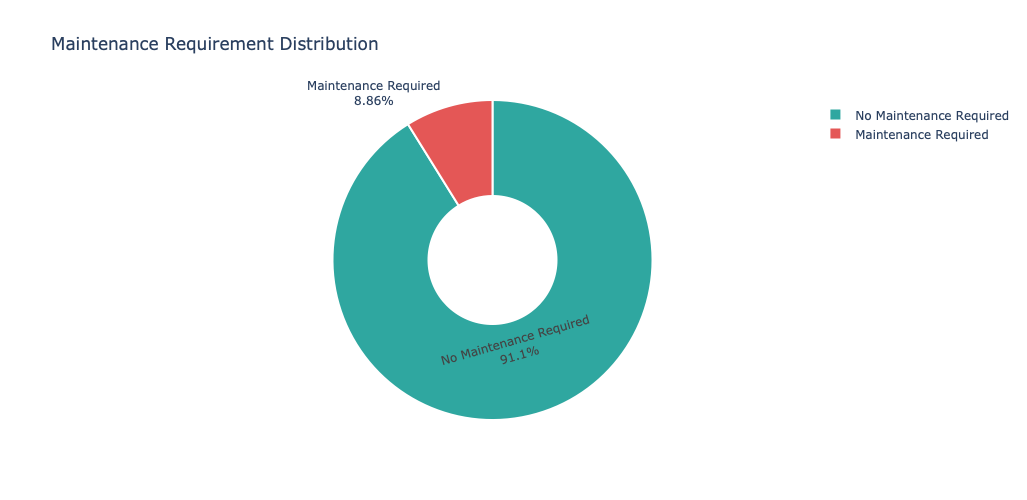

In [131]:
# How much % of machines requiring maintainence:
total = len(df)
yes_count = (df['Maintenance_Required'] == 'Yes').sum()
percentage_yes = (yes_count / total) * 100 if total > 0 else 0

print(f"Total machines: {total}")
print(f"Machines needing maintenance: {yes_count} ({percentage_yes:.2f}%)")
print(f"Machines NOT needing maintenance: {total - yes_count} ({100 - percentage_yes:.2f}%)")

#pie chart:
labels = ['Maintenance Required', 'No Maintenance Required']
values = [yes_count, total - yes_count]
fig = go.Figure(
    data=[go.Pie(labels=labels, values=values, hole=0.4,
                 marker=dict( colors=['#E45756', '#2FA7A0'],
                line=dict(color='white', width=2)),
            textinfo='percent+label',
            hoverinfo='label+value+percent')])

fig.update_layout(
    title='Maintenance Requirement Distribution',
    template='plotly_white',
    width=700,
    height=500)
fig.show()

# Sensor Correlation Analysis:

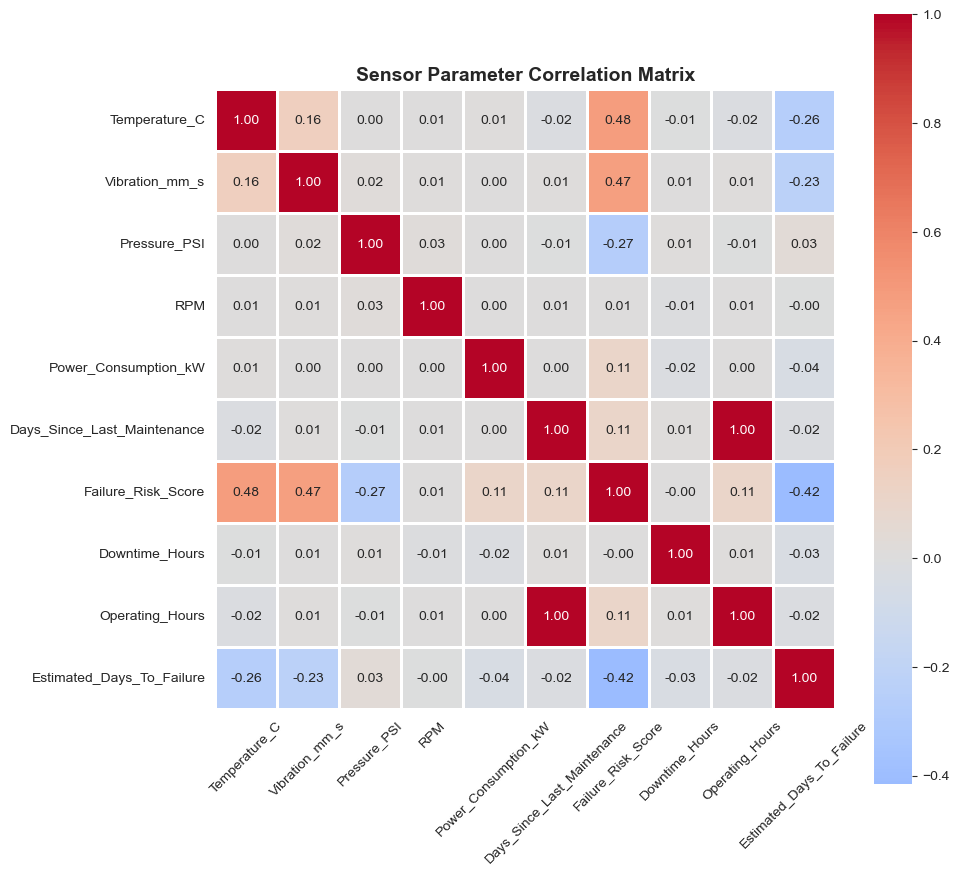

In [185]:
sensor_columns = ['Temperature_C', 'Vibration_mm_s', 'Pressure_PSI', 
                  'RPM', 'Power_Consumption_kW', 'Days_Since_Last_Maintenance', 
                  'Failure_Risk_Score','Downtime_Hours','Operating_Hours','Estimated_Days_To_Failure']

correlation_matrix = df[sensor_columns].corr()

# Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, fmt='.2f')
plt.title('Sensor Parameter Correlation Matrix', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.savefig('matrix.png')
plt.show()